# **1.Time Benchmark**

In [6]:
import pandas as pd
df = pd.read_csv('../../Data/AAM/unbalance/mapping_times.csv', index_col=0)
#df.rename(columns={'Unnamed: 0': 'dataset'}, inplace=True)
df['Number of Reactions'] = [273, 382, 3000, 1758, 491]
df


,rxn_mapper,graphormer,local_mapper,rdt,Number of Reactions
ecoli,5.192616,24.712734,36.963480,1191.440930,273
recon3d,9.931395,45.408187,77.157520,3102.505229,382
uspto_3k,39.552069,242.108209,311.241907,12293.527838,3000
golden,20.423181,121.131330,148.219056,5022.170804,1758
natcomm,5.404484,31.207542,37.409376,1052.871712,491


In [4]:
import pandas as pd

time_dict = {
    'ecoli': {'RXNMapper': 6.17, 'Graphormer': 28.72, 'LocalMapper': 44.27, 'RDTool': 1204.08},
    'recon3d': {'RXNMapper': 12.43, 'Graphormer': 51.51, 'LocalMapper': 95.83, 'RDTool': 3266.31},
    'uspto_3k': {'RXNMapper': 41.79, 'Graphormer': 270.55, 'LocalMapper': 363.42, 'RDTool': 13632.40},
    'golden': {'RXNMapper': 22.22, 'Graphormer': 146.78, 'LocalMapper': 178.43, 'RDTool': 5141.58},
    'natcomm': {'RXNMapper': 5.86, 'Graphormer': 35.52, 'LocalMapper': 41.86, 'RDTool': 1102.16}
}


df = pd.DataFrame(time_dict)
df = df.T
df['Number of Reactions'] = [273, 382, 3000, 1758, 491]
df



,RXNMapper,Graphormer,LocalMapper,RDTool,Number of Reactions
ecoli,6.17,28.72,44.27,1204.08,273
recon3d,12.43,51.51,95.83,3266.31,382
uspto_3k,41.79,270.55,363.42,13632.40,3000
golden,22.22,146.78,178.43,5141.58,1758
natcomm,5.86,35.52,41.86,1102.16,491


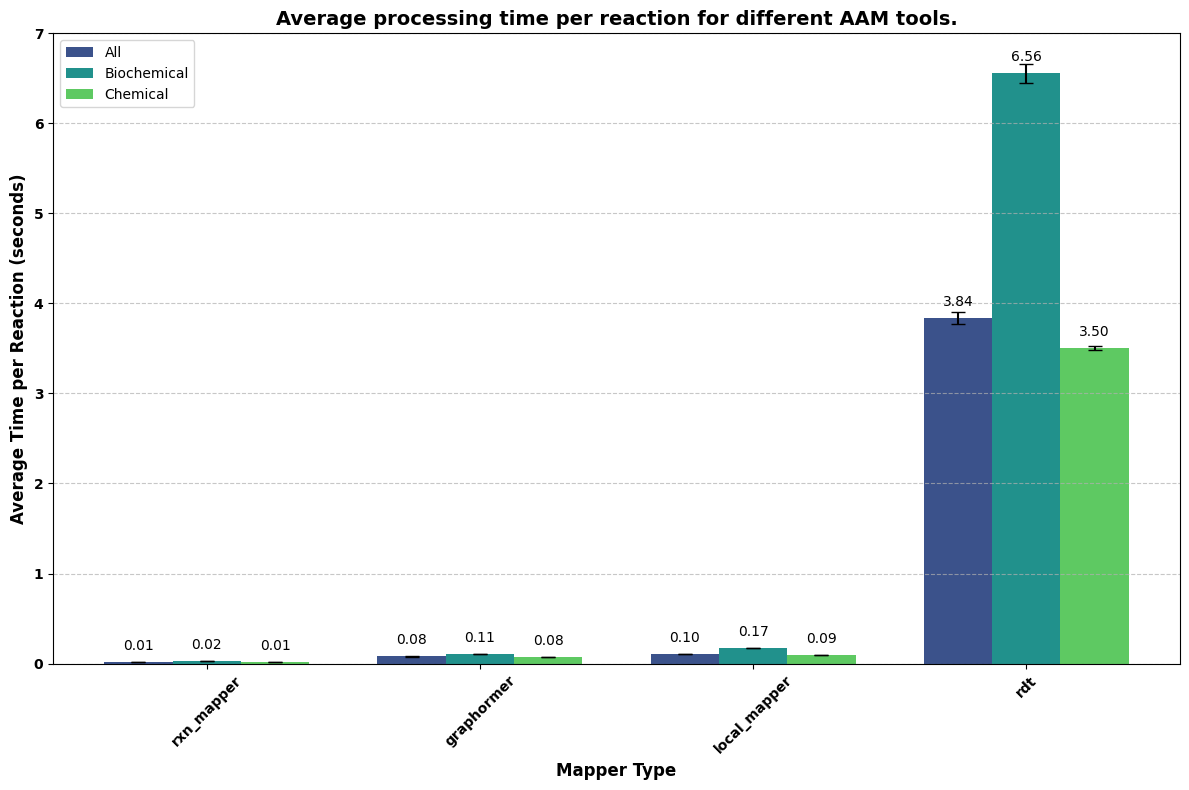

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Set color palette
colors = sns.color_palette("viridis", n_colors=3)  # 3 shades for all, biochemical, and chemical

# Plotting
plt.figure(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.25
x = np.arange(len(df.columns[:-1]))  # Position indexes for mappers

# Plot each category for mappers with error bars
for i, mapper in enumerate(df.columns[:-1]):
    # 'All' category
    all_avg = df[mapper].sum() / df['Number of Reactions'].sum()
    all_std = np.sqrt(np.sum((df[mapper]/df['Number of Reactions']- all_avg) ** 2) / df['Number of Reactions'].sum())

    plt.bar(x[i] - bar_width, all_avg, width=bar_width, color=colors[0], label='All' if i == 0 else "", yerr=all_std, capsize=5)

    # 'Biochemical' category
    bio_avg = df[mapper][:2].sum() / df['Number of Reactions'][:2].sum()
    bio_std = np.sqrt(np.sum((df[mapper][:2]/ df['Number of Reactions'][:2] - bio_avg) ** 2) / df['Number of Reactions'][:2].sum())

    plt.bar(x[i], bio_avg, width=bar_width, color=colors[1], label='Biochemical' if i == 0 else "", yerr=bio_std, capsize=5)

    # 'Chemical' category
    chem_avg = df[mapper][2:].sum() / df['Number of Reactions'][2:].sum()
    chem_std = np.sqrt(np.sum((df[mapper][2:]/ df['Number of Reactions'][2:] - chem_avg) ** 2) / df['Number of Reactions'][2:].sum())

    plt.bar(x[i] + bar_width, chem_avg, width=bar_width, color=colors[2], label='Chemical' if i == 0 else "", yerr=chem_std, capsize=5)

    # Adding text labels for average times
    label_offset = 0.1  # Constant offset for label placement
    plt.text(x[i] - bar_width, all_avg + label_offset, f'{all_avg:.2f}', ha='center', va='bottom')
    plt.text(x[i], bio_avg + label_offset, f'{bio_avg:.2f}', ha='center', va='bottom')
    plt.text(x[i] + bar_width, chem_avg + label_offset, f'{chem_avg:.2f}', ha='center', va='bottom')

plt.xlabel('Mapper Type', fontsize=12, weight='bold')
plt.ylabel('Average Time per Reaction (seconds)', fontsize=12, weight='bold')
plt.title('Average processing time per reaction for different AAM tools.', fontsize=14, weight='bold')
plt.xticks(x, df.columns[:-1], rotation=45, fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper left')
plt.ylim(0, 7)  # Set y-axis limits to start from 0 to 20 seconds

plt.tight_layout()
plt.show()


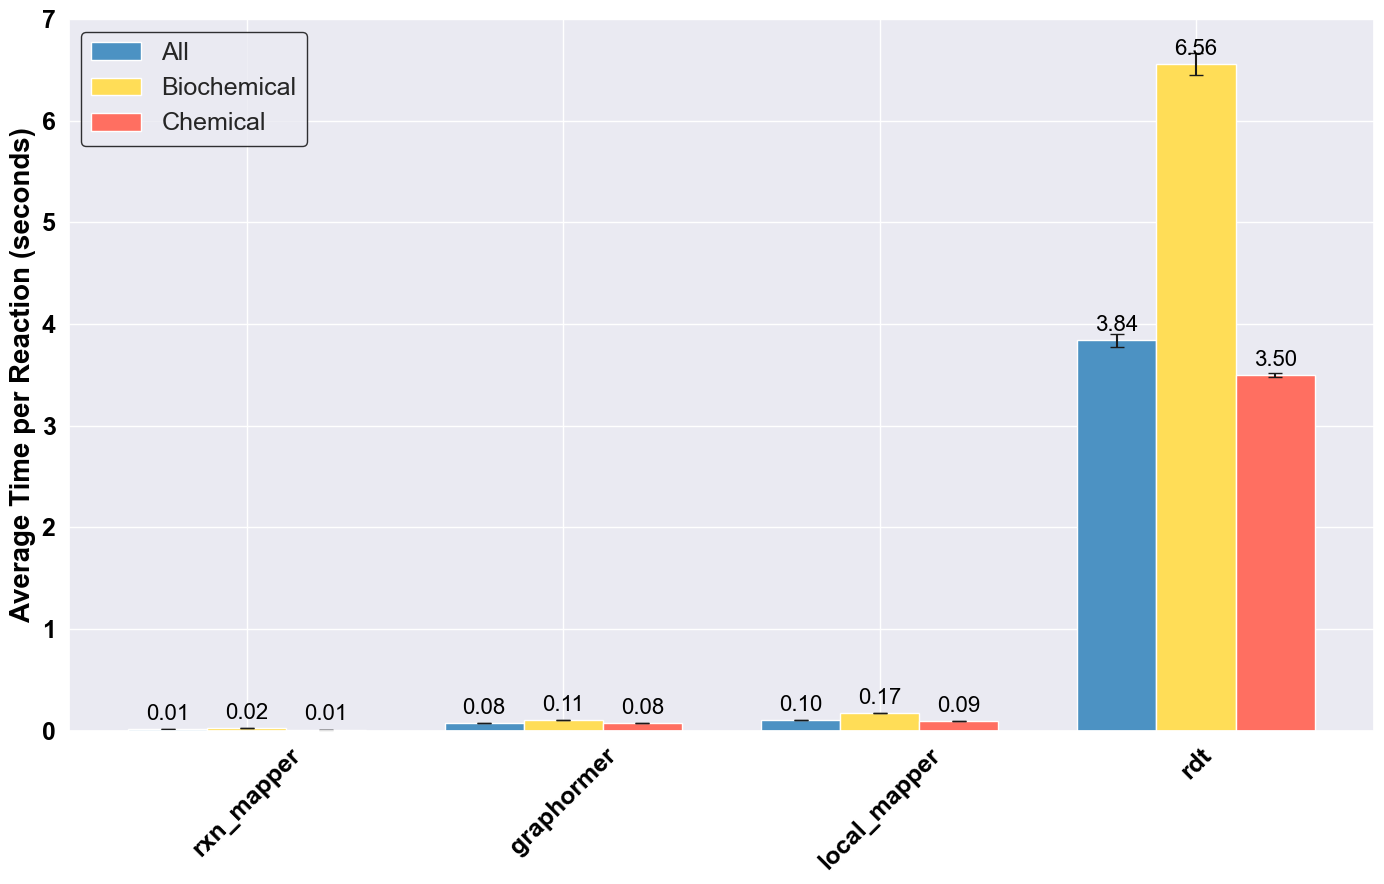

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

colors = ["#4c92c3", "#ffdd57", "#ff6f61"]  # More vibrant colors for differentiation

# Plotting
plt.figure(figsize=(14, 9))
sns.set(style="darkgrid")  # Correct style for background grid

# Define bar width and positions
bar_width = 0.25
x = np.arange(len(df.columns[:-1]))  # Position indexes for mappers

# Plot each category for mappers with error bars
for i, mapper in enumerate(df.columns[:-1]):
    # 'All' category
    all_avg = df[mapper].sum() / df['Number of Reactions'].sum()
    all_std = np.sqrt(np.sum((df[mapper]/df['Number of Reactions']- all_avg) ** 2) / df['Number of Reactions'].sum())

    # 'Biochemical' category
    bio_avg = df[mapper][:2].sum() / df['Number of Reactions'][:2].sum()
    bio_std = np.sqrt(np.sum((df[mapper][:2]/ df['Number of Reactions'][:2] - bio_avg) ** 2) / df['Number of Reactions'][:2].sum())
 
    # 'Chemical' category
    chem_avg = df[mapper][2:].sum() / df['Number of Reactions'][2:].sum()
    chem_std = np.sqrt(np.sum((df[mapper][2:]/ df['Number of Reactions'][2:] - chem_avg) ** 2) / df['Number of Reactions'][2:].sum())

    plt.bar(x[i] - bar_width, all_avg, width=bar_width, color=colors[0], label='All' if i == 0 else "", yerr=all_std, capsize=5)
    plt.bar(x[i], bio_avg, width=bar_width, color=colors[1], label='Biochemical' if i == 0 else "", yerr=bio_std, capsize=5)
    plt.bar(x[i] + bar_width, chem_avg, width=bar_width, color=colors[2], label='Chemical' if i == 0 else "", yerr=chem_std, capsize=5)

    # Text labels for average times
    label_offset = 0.05  # Constant offset for label placement
    plt.text(x[i] - bar_width, all_avg + label_offset, f'{all_avg:.2f}', ha='center', va='bottom', color='black', fontsize=16)
    plt.text(x[i], bio_avg + label_offset, f'{bio_avg:.2f}', ha='center', va='bottom', color='black', fontsize=16)
    plt.text(x[i] + bar_width, chem_avg + label_offset, f'{chem_avg:.2f}', ha='center', va='bottom', color='black', fontsize=16)

#plt.xlabel('Mapper Type', fontsize=14, weight='bold', color='black')
plt.ylabel('Average Time per Reaction (seconds)', fontsize=20, weight='bold', color='black')
#plt.title('Average processing time per reaction for different AAM tools', fontsize=16, weight='bold', color='black')

plt.xticks(x, df.columns[:-1], rotation=45, fontsize=18, weight='bold', color='black')
plt.yticks(fontsize=18, weight='bold', color='black')
plt.legend(fontsize=18, loc='upper left', frameon=True, edgecolor='black')
plt.ylim(0, 7)  # Set y-axis limits to start from 0 to 20 seconds

plt.tight_layout()
plt.savefig('./fig/aam_time_benchmark.pdf', dpi = 600)
plt.show()


# **2. Success rate Benchmark**

In [9]:
import re

def calculate_mapping_failures(data):
    """
    Calculates the number of failed mappings based on the absence of atom maps in the reaction data.
    Args:
    data (list of dicts): A list of dictionaries where each dictionary represents reaction data.

    Returns:
    dict: A dictionary containing the number of fails and success rates for each mapper type.
    """
    
    # Keys to evaluate
    keys_to_check = ['rxn_mapper', 'graphormer', 'local_mapper', 'rdt']
    
    # Initialize results dictionary to store fails and successes
    results = {key: {'fails': 0, 'successes': 0} for key in keys_to_check}
    
    # Regex pattern to find atom maps
    atom_map_pattern = re.compile(r':\d+')
    
    # Process each dictionary in the list
    for entry in data:
        for key in keys_to_check:
            # Get the reaction data
            reaction_data = entry.get(key, "")
            
            # Check if the reaction contains any atom maps
            if re.search(atom_map_pattern, reaction_data):
                results[key]['successes'] += 1
            else:
                results[key]['fails'] += 1
    
    # Prepare aggregate results to provide total fails and success rates
    aggregate_results = {}
    for key in keys_to_check:
        total_fails = results[key]['fails']
        total_successes = results[key]['successes']
        total_attempts = total_fails + total_successes
        success_rate = (total_successes / total_attempts) if total_attempts > 0 else 0

        aggregate_results[f"{key}_number_fails"] = int(total_fails)
        aggregate_results[f"{key}_success_rate"] = round(success_rate * 100, 2)  # Express as percentage
    
    return aggregate_results


In [10]:
import sys
sys.path.append('../..')
from SynTemp.SynUtils.utils import load_database

data_paths = {
    'ecoli': '../../Data/AAM/unbalance/ecoli/ecoli_aam_reactions.json.gz',
    'recon3d': '../../Data/AAM/unbalance/recon3d/recon3d_aam_reactions.json.gz',
    'uspto_3k': '../../Data/AAM/unbalance/uspto_3k/uspto_3k_aam_reactions.json.gz',
    'golden': '../../Data/AAM/unbalance/golden/golden_aam_reactions.json.gz',
    'natcomm': '../../Data/AAM/unbalance/natcomm/natcomm_aam_reactions.json.gz'
}

# Dictionary to hold the results for each dataset
results_dict = {}

# Process each dataset
for dataset_name, filepath in data_paths.items():
    # Load the data
    data = load_database(filepath)
    
    # Calculate fails and success rates
    results = calculate_mapping_failures(data)
    
    # Store the results
    results_dict[dataset_name] = results

# Convert the results dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results_dict, orient='index')

# Display or save the DataFrame
df_results.T

,ecoli,recon3d,uspto_3k,golden,natcomm
rxn_mapper_number_fails,0.0,0.0,0.0,0.00,0.00
rxn_mapper_success_rate,100.0,100.0,100.0,100.00,100.00
graphormer_number_fails,0.0,0.0,0.0,0.00,0.00
graphormer_success_rate,100.0,100.0,100.0,100.00,100.00
local_mapper_number_fails,0.0,0.0,0.0,0.00,0.00
local_mapper_success_rate,100.0,100.0,100.0,100.00,100.00
rdt_number_fails,0.0,0.0,0.0,4.00,4.00
rdt_success_rate,100.0,100.0,100.0,99.77,99.19


# **3. Accuracy Benchmark**

In [2]:
import sys
import pandas as pd
sys.path.append('../..')
from SynTemp.SynAAM.aam_validator import AMMValidator

In [ ]:
data_paths = {
    'ecoli': '../../Data/AAM/unbalance/ecoli/ecoli_aam_reactions.json.gz',
    'recon3d': '../../Data/AAM/unbalance/recon3d/recon3d_aam_reactions.json.gz',
    'uspto_3k': '../../Data/AAM/unbalance/uspto_3k/uspto_3k_aam_reactions.json.gz',
    'golden': '../../Data/AAM/unbalance/golden/golden_aam_reactions.json.gz',
    'natcomm': '../../Data/AAM/unbalance/natcomm/natcomm_aam_reactions.json.gz'
}
results_dict = {}

# Process each dataset
for dataset_name, filepath in data_paths.items():
    # Load the data
    data = load_database(filepath)
    
    # Calculate fails and success rates
    results, _ = AMMValidator.validate_smiles(
            data=data,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="RC",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = [["rxn_mapper", "graphormer", "local_mapper"], ["rxn_mapper", "graphormer", "local_mapper", "rdt"]],
            ignore_tautomers=False
    )
    
    # Store the results
    results_dict[dataset_name] = results

bio = []
for dataset_name, filepath in data_paths.items():
    # Load the dataset
    single = load_database(filepath)
    
    # Extend the bio list if the dataset is either 'ecoli' or 'recon3d'
    if dataset_name in ['ecoli', 'recon3d']:
        bio.extend(single)
results, _ = AMMValidator.validate_smiles(
            data=bio,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="RC",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = [["rxn_mapper", "graphormer", "local_mapper"], ["rxn_mapper", "graphormer", "local_mapper", "rdt"]],
            ignore_tautomers=False
    )
results_dict['Biochemical'] = results   


chem = []
for dataset_name, filepath in data_paths.items():
    # Load the dataset
    single = load_database(filepath)
    
    # Extend the bio list if the dataset is either 'ecoli' or 'recon3d'
    if dataset_name in ['golden', 'natcomm', 'uspto_3k']:
        chem.extend(single)

results, _ = AMMValidator.validate_smiles(
            data=chem,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="RC",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = [["rxn_mapper", "graphormer", "local_mapper"], ["rxn_mapper", "graphormer", "local_mapper", "rdt"]],
            ignore_tautomers=False
    )
results_dict['Chemical'] = results   


In [ ]:
strategies = [["rxn_mapper", "graphormer"], ["rxn_mapper", "rdt"], ["rxn_mapper", "local_mapper"],
              ["graphormer", "rdt"], ["graphormer", "local_mapper"], ["rdt", "local_mapper"],
              ["rxn_mapper", "graphormer", "rdt"], ["rxn_mapper", "graphormer", "local_mapper"],
              ["rxn_mapper", "rdt", "local_mapper"], ["graphormer", "rdt", "local_mapper"],
              ["rxn_mapper", "graphormer", "rdt", "local_mapper"]]

In [ ]:
data_paths = {
    'ecoli': '../../Data/AAM/ecoli/ecoli_aam_reactions.json.gz',
    'recon3d': '../../Data/AAM/recon3d/recon3d_aam_reactions.json.gz',
    'uspto_3k': '../../Data/AAM/uspto_3k/uspto_3k_aam_reactions.json.gz',
    'golden': '../../Data/AAM/golden/golden_aam_reactions.json.gz',
    'natcomm': '../../Data/AAM/natcomm/natcomm_aam_reactions.json.gz'
}
results_dict = {}

# Process each dataset
for dataset_name, filepath in data_paths.items():
    # Load the data
    data = load_database(filepath)
    
    # Calculate fails and success rates
    results, _ = AMMValidator.validate_smiles(
            data=data,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="ITS",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = strategies
    )
    
    # Store the results
    results_dict[dataset_name] = results

bio = []
for dataset_name, filepath in data_paths.items():
    # Load the dataset
    single = load_database(filepath)
    
    # Extend the bio list if the dataset is either 'ecoli' or 'recon3d'
    if dataset_name in ['ecoli', 'recon3d']:
        bio.extend(single)
results, _ = AMMValidator.validate_smiles(
            data=bio,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="RC",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = strategies
    )
results_dict['Biochemical'] = results   


chem = []
for dataset_name, filepath in data_paths.items():
    # Load the dataset
    single = load_database(filepath)
    
    # Extend the bio list if the dataset is either 'ecoli' or 'recon3d'
    if dataset_name in ['golden', 'natcomm', 'uspto_3k']:
        chem.extend(single)

results, _ = AMMValidator.validate_smiles(
            data=chem,
            ground_truth_col="ground_truth",
            mapped_cols=["rxn_mapper", "graphormer", "local_mapper", "rdt"],
            check_method="RC",
            ignore_aromaticity=False,
            n_jobs=4,
            verbose=2,
            ensemble=True,
            strategies = strategies
    )
results_dict['Chemical'] = results   


    

In [4]:
# Initialize an empty DataFrame to hold all data
import pandas as pd
final_df = pd.DataFrame()

# Process each data type
for data_type, records in results_dict.items():
    # Create a DataFrame
    df = pd.DataFrame(records)
    
    # Add columns for accuracy and success_rate specific to the data type
    df['accuracy_col'] = data_type + '_accuracy'
    df['success_col'] = data_type + '_success_rate'
    df['Accuracy'] = round(df['accuracy']*100, 2) 
    df['Success Rate'] = round(df['success_rate'], 2) 
    
    # Pivot the DataFrame
    df_pivot = df.pivot(index='mapper', columns='accuracy_col', values='Accuracy').join(
        df.pivot(index='mapper', columns='success_col', values='Success Rate')
    )
    
    # Merge with the final DataFrame
    if final_df.empty:
        final_df = df_pivot
    else:
        final_df = final_df.join(df_pivot)

# Reset index to make 'mapper' a column
final_df.reset_index(inplace=True)
final_df = final_df.reindex([5, 2, 3, 4, 0, 1])
final_df = final_df.reset_index(drop=True)

,mapper,ecoli_accuracy,ecoli_success_rate,recon3d_accuracy,recon3d_success_rate,uspto_3k_accuracy,uspto_3k_success_rate,golden_accuracy,golden_success_rate,natcomm_accuracy,natcomm_success_rate,Biochemical_accuracy,Biochemical_success_rate,Chemical_accuracy,Chemical_success_rate
0,ensemble_1,88.24,37.36,67.97,40.05,100.00,68.60,98.59,72.70,99.47,76.17,76.08,38.93,99.46,70.68
1,ensemble_2,93.48,33.70,72.34,36.91,100.00,66.17,99.14,66.27,99.43,71.28,80.69,35.57,99.66,66.68
2,graphormer,42.12,100.00,34.82,100.00,95.10,100.00,89.59,100.00,92.87,100.00,37.86,100.00,93.05,100.00
3,local_mapper,60.07,100.00,39.79,100.00,97.53,100.00,87.14,100.00,91.04,100.00,48.24,100.00,93.45,100.00
4,rdt,77.29,100.00,54.97,100.00,90.90,100.00,82.54,100.00,84.11,100.00,64.27,100.00,87.46,100.00
5,rxn_mapper,72.53,100.00,48.69,100.00,93.53,100.00,87.43,100.00,87.58,100.00,58.63,100.00,90.93,100.00


In [20]:
aam_json = final_df.to_dict(orient='records')

In [21]:
from SynTemp.SynUtils.utils import save_database, load_database
save_database(aam_json, '../../Data/AAM/unbalance/aam_benchmark.json.gz')

In [22]:
final_df = pd.DataFrame(load_database('../../Data/AAM/unbalance/aam_benchmark.json.gz'))

In [ ]:
final_df[['mapper', 'Biochemical_accuracy', 'Biochemical_success_rate', 'Chemical_accuracy', 'Chemical_success_rate']]

,mapper,Biochemical_accuracy,Biochemical_success_rate,Chemical_accuracy,Chemical_success_rate
0,ensemble_1,76.17,39.08,99.30,70.97
1,ensemble_2,80.69,35.57,99.46,67.23
2,graphormer,37.86,100.00,92.95,100.00
3,local_mapper,48.24,100.00,93.03,100.00
4,rdt,64.27,100.00,87.33,100.00
5,rxn_mapper,58.78,100.00,90.40,100.00


## 3.1 Heatmap

In [23]:
data_visual = final_df[['mapper', 'ecoli_accuracy', 'recon3d_accuracy', 'uspto_3k_accuracy', 'golden_accuracy', 'natcomm_accuracy','Biochemical_accuracy', 'Chemical_accuracy']]
data_visual.rename({'ecoli_accuracy':'ecoli', 'recon3d_accuracy':'recon3d', 'uspto_3k_accuracy':'uspto_3k',
             'golden_accuracy':'golden', 'natcomm_accuracy':'natcomm',
             'Biochemical_accuracy':'Biochemical', 'Chemical_accuracy':'Chemical'}, axis=1, inplace=True)

/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/395980148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_visual.rename({'ecoli_accuracy':'ecoli', 'recon3d_accuracy':'recon3d', 'uspto_3k_accuracy':'uspto_3k',


In [24]:
data_visual['mapper'] = ['RXNMapper', 'Graphormer', 'LocalMapper', 'RDTool', 'Ensemble_1', 'Ensemble_2']

/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/341296478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_visual['mapper'] = ['RXNMapper', 'Graphormer', 'LocalMapper', 'RDTool', 'Ensemble_1', 'Ensemble_2']


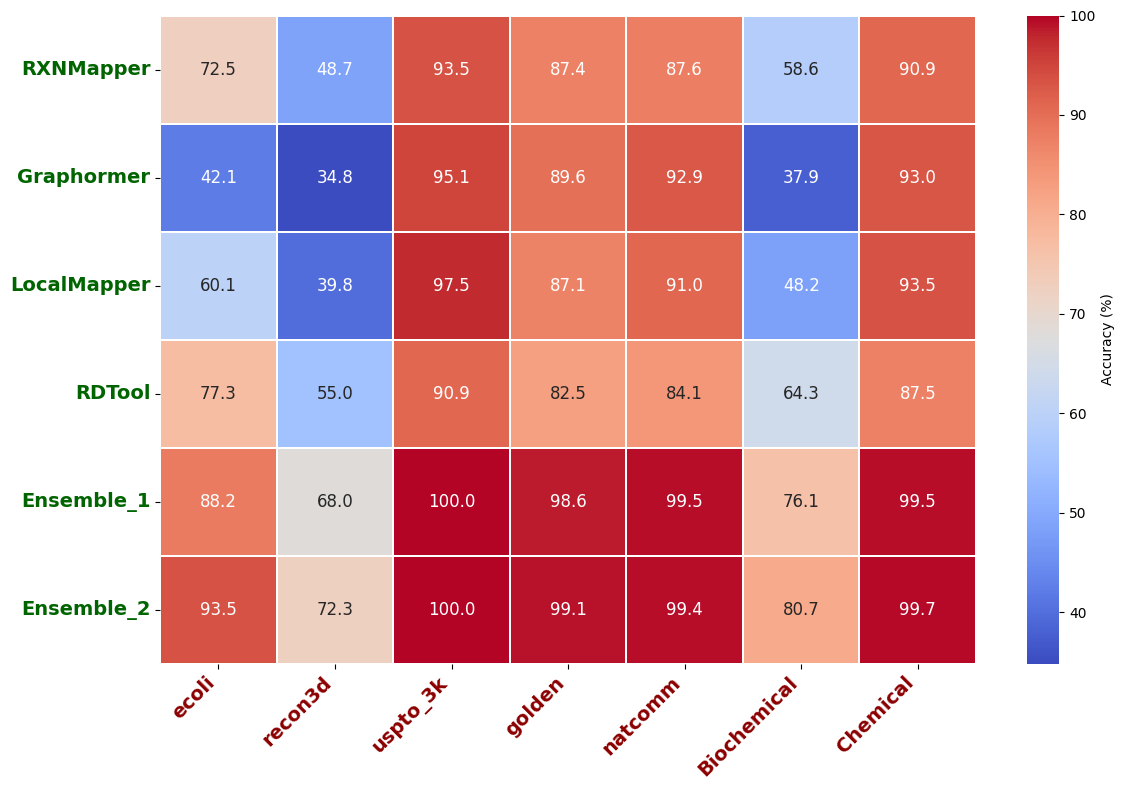

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'test' is your DataFrame and already includes the necessary data
heatmap_data = data_visual.set_index('mapper')  # Adjust this line if the DataFrame preparation differs

# Plotting
plt.figure(figsize=(12, 8))
# Heatmap with annotations and adjusted color map
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.3, linecolor='white', 
            cbar=True, cbar_kws={'label': 'Accuracy (%)', 'orientation': 'vertical'}, annot_kws={"size": 12})
# Enhancements for title and labels
#plt.title('Heatmap of Mapper Accuracies Across Datasets', fontsize=18, color='navy', fontweight='bold', pad=20)
# plt.xlabel('Dataset', fontsize=16, color='black', labelpad=10)
# plt.ylabel('Mapper', fontsize=16, color='black', labelpad=10)
plt.ylabel(None)
# Adjustments for tick marks
plt.xticks(rotation=45, ha='right', fontsize=14, fontweight='bold', color='darkred')
plt.yticks(rotation=0, fontsize=14, fontweight='bold', color='darkgreen')
plt.tight_layout()  # Ensure the layout fits without overlap
plt.savefig('./fig/aam_accuracy_heatmap.pdf', dpi = 600)
plt.show()


In [ ]:
final_df

## 3.2 Barplot

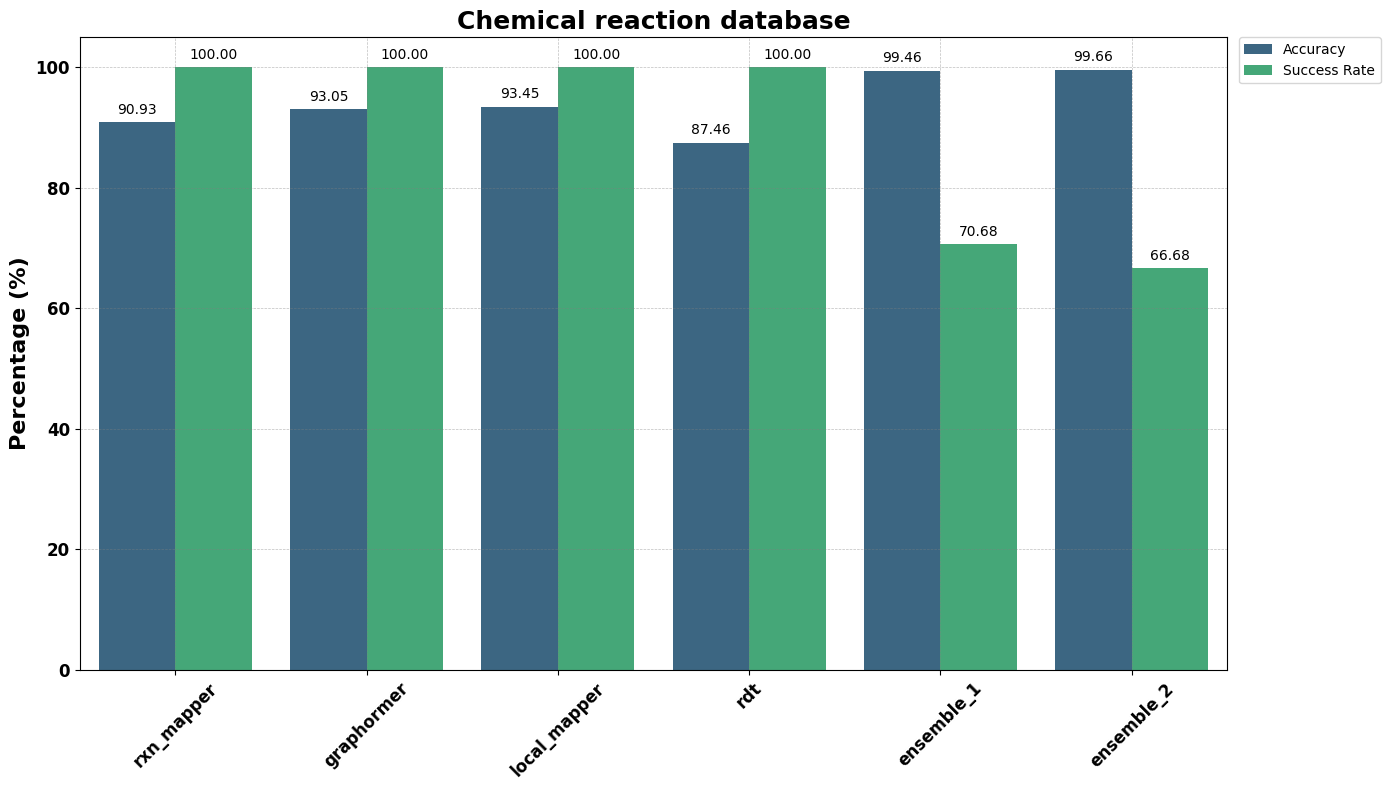

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_accuracy_success_rate_seaborn(df, accuracy_col, success_col):
    """
    Plots grouped bar charts for accuracy and success rates using Seaborn,
    from specified columns in a DataFrame.
    
    Parameters:
    - df: DataFrame containing the data
    - accuracy_col: string, name of the column with accuracy data
    - success_col: string, name of the column with success rate data
    """
    # Ensure the mapper is treated as categorical
    df['mapper'] = df['mapper'].astype(str)

    # Create a temporary DataFrame to facilitate Seaborn plotting
    temp_df = df[['mapper', accuracy_col, success_col]].melt(id_vars=['mapper'], 
                                                             var_name='Metric', 
                                                             value_name='Percentage')

    # Mapping the original column names to more user-friendly names
    temp_df['Metric'] = temp_df['Metric'].map({accuracy_col: 'Accuracy', success_col: 'Success Rate'})
    
    # Initialize the matplotlib figure
    plt.figure(figsize=(14, 8))
    
    # Plot using Seaborn
    sns.barplot(x='mapper', y='Percentage', hue='Metric', data=temp_df, palette='viridis')

    # Adding labels above bars
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only add annotations to bars with a non-zero height
            ax.annotate(format(height, '.2f'), 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        xytext=(0, 9), 
                        textcoords='offset points')

    # Set title and labels with enhanced font settings
    plt.title('Chemical reaction database', fontsize=18, fontweight='bold')
    plt.xlabel(None)
    plt.ylabel('Percentage (%)', fontsize=16, fontweight='semibold')
    
    # Improve the appearance of ticks
    plt.xticks(rotation=45, fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')

    # Adding a grid for better visual alignment
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

    # Adjust legend to prevent overlap with the bars
    plt.legend(title=None, bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    
    plt.tight_layout()
    plt.show()

df = final_df.copy()
plot_accuracy_success_rate_seaborn(df, 'Chemical_accuracy', 'Chemical_success_rate')


/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/532892815.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/532892815.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12, fontweight='bold')
/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/532892815.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
/var/folders/t0/4s7kmdv11y93hgspz_xf83jc0000gn/T/ipykernel_21891/532892815.py:51: UserWarning: set_t

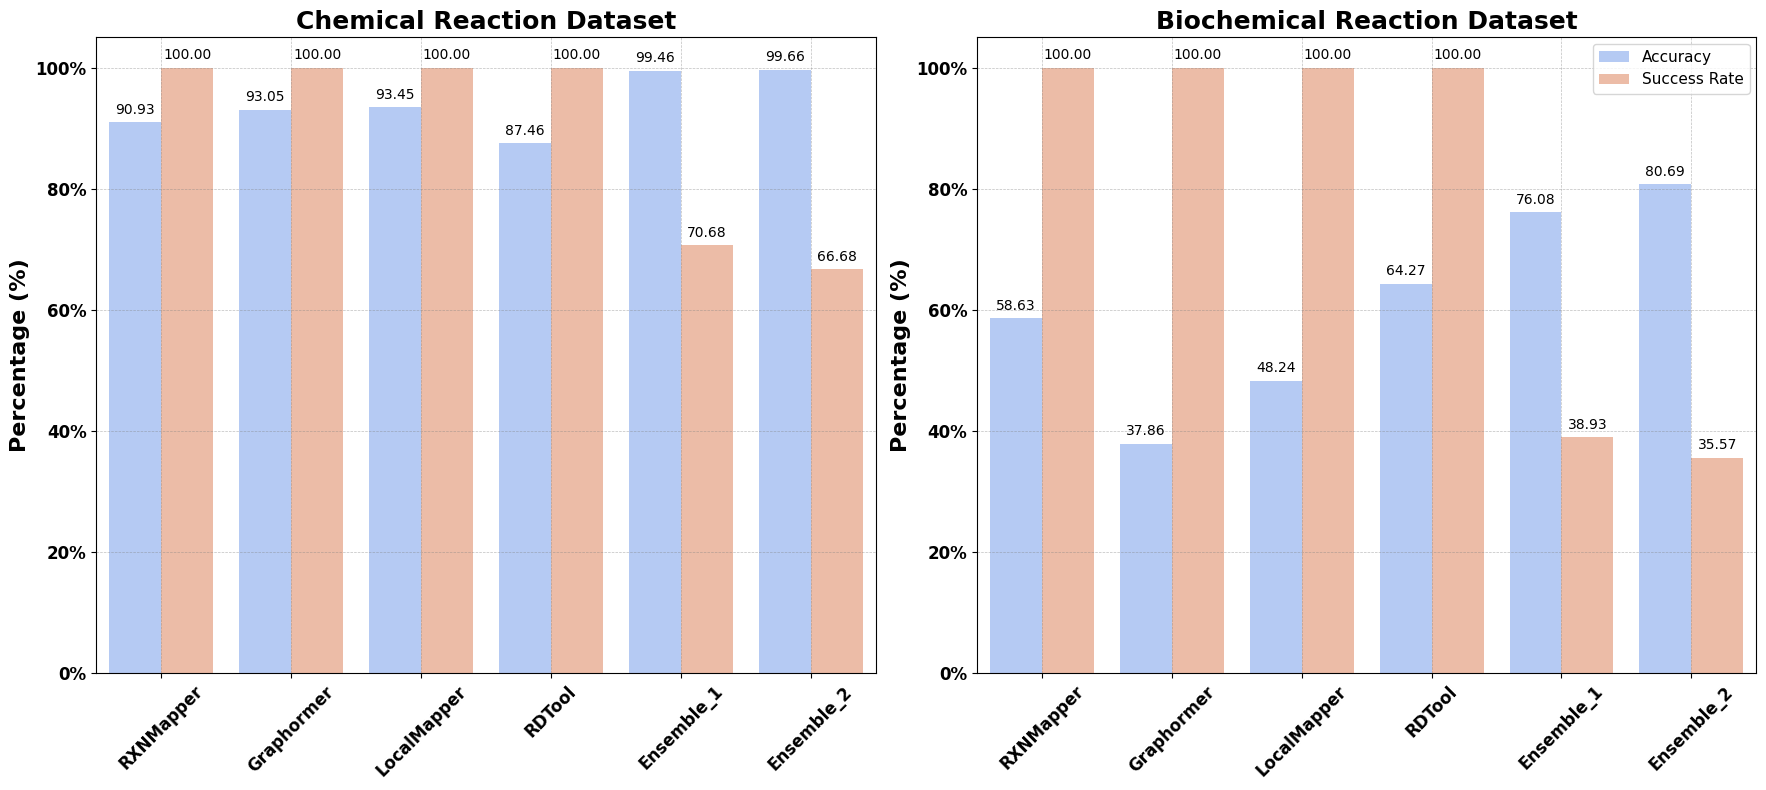

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_accuracy_success_rate_subplot(df, accuracy_cols, success_cols, titles):
    """
    Plots 1x2 subplots for accuracy and success rates using Seaborn,
    from specified columns in a DataFrame.

    Parameters:
    - df: DataFrame containing the data
    - accuracy_cols: list of strings, names of the columns with accuracy data
    - success_cols: list of strings, names of the columns with success rate data
    - titles: list of strings, titles for each subplot
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))  # 1x2 subplot layout

    for idx, ax in enumerate(axes):
        # Ensure the mapper is treated as categorical
        df['mapper'] = df['mapper'].astype(str)

        # Create a temporary DataFrame to facilitate Seaborn plotting
        temp_df = df[['mapper', accuracy_cols[idx], success_cols[idx]]].melt(id_vars=['mapper'], 
                                                                            var_name='Metric', 
                                                                            value_name='Percentage')

        # Mapping the original column names to more user-friendly names
        temp_df['Metric'] = temp_df['Metric'].map({accuracy_cols[idx]: 'Accuracy', success_cols[idx]: 'Success Rate'})
        
        # Plot using Seaborn on the specified axis
        sns.barplot(x='mapper', y='Percentage', hue='Metric', data=temp_df, palette='coolwarm', ax=ax)

        # Adding labels above bars
        for p in ax.patches:
            height = p.get_height()
            if height > 0:  # Only add annotations to bars with a non-zero height
                ax.annotate(format(height, '.2f'), 
                            (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', 
                            xytext=(0, 9), 
                            textcoords='offset points')

        # Set title and labels with enhanced font settings for each subplot
        ax.set_title(titles[idx], fontsize=18, fontweight='bold')
        ax.set_xlabel(None)
        ax.set_ylabel('Percentage (%)', fontsize=16, fontweight='semibold')
        
        # Improve the appearance of ticks
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12, fontweight='bold')
        ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=12, fontweight='bold')

        # Adding a grid for better visual alignment
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

        # Adjust legend to prevent overlap with the bars
        
        if idx != 0:
            ax.legend(title=None, bbox_to_anchor=(0.79, 0.99), loc=2, borderaxespad=0., fontsize=11)
        else:
            ax.legend([],[], frameon=False)
    plt.tight_layout()
    plt.savefig('./fig/aam_accuracy_barplot.pdf', dpi = 600)
    plt.show()

df = final_df.copy()

df['mapper'] = ['RXNMapper', 'Graphormer', 'LocalMapper', 'RDTool', 'Ensemble_1', 'Ensemble_2']
plot_accuracy_success_rate_subplot(df, ['Chemical_accuracy', 'Biochemical_accuracy'], ['Chemical_success_rate', 'Biochemical_success_rate'], 
                                   ['Chemical Reaction Dataset', 'Biochemical Reaction Dataset'])


In [28]:
data_visual

,mapper,ecoli,recon3d,uspto_3k,golden,natcomm,Biochemical,Chemical
0,RXNMapper,72.53,48.69,93.53,87.43,87.58,58.63,90.93
1,Graphormer,42.12,34.82,95.10,89.59,92.87,37.86,93.05
2,LocalMapper,60.07,39.79,97.53,87.14,91.04,48.24,93.45
3,RDTool,77.29,54.97,90.90,82.54,84.11,64.27,87.46
4,Ensemble_1,88.24,67.97,100.00,98.59,99.47,76.08,99.46
5,Ensemble_2,93.48,72.34,100.00,99.14,99.43,80.69,99.66
